<a href="https://colab.research.google.com/github/sindla97/Machine-Learning/blob/main/NER_finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name-entity recognition

##Data Loading and Pre processing

In [1]:
#importing library
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
hemanthshanmuka,6f6376ab1618e4700f4cfc6e4de171b2

In [2]:
!pip install opendatasets

import opendatasets as od

od.download(
	"https://www.kaggle.com/datasets/naseralqaydeh/named-entity-recognition-ner-corpus")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemanthshanmuka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/naseralqaydeh/named-entity-recognition-ner-corpus


100%|██████████| 4.14M/4.14M [00:01<00:00, 3.43MB/s]


In [3]:
# reading the XLSX file
file =('/content/named-entity-recognition-ner-corpus/ner.csv')
ner = pd.read_csv(file)

In [4]:


od.download("https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus?select=ner_dataset.csv")
data_path = "/content/entity-annotated-corpus/ner_dataset.csv"

data = pd.read_csv(data_path, encoding= 'unicode_escape')
# filling the first column that determines which sentence each word belongs to.
data.fillna(method = 'ffill', inplace = True)
data.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hemanthshanmuka
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/abhinavwalia95/entity-annotated-corpus


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]


,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O


In [ ]:
ner.head()

,Sentence #,Sentence,POS,Tag
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."


In [ ]:
ner.to_csv('/content/sample_data/ner.csv')
data.to_csv('/content/sample_data/ner_dataset.csv')

In [5]:
def tags(text):
  text=text[2:-2]
  return text.split("', '")


ner['new_tags']=ner['Tag'].apply(tags)

In [ ]:
ner['POS']=ner['POS'].apply(tags)

In [8]:
ner['Sentence_tok']=ner['Sentence'].apply(lambda x : x.split() )

In [ ]:
len(ner['Sentence_tok'][0]),len(ner['POS'][0]),len(ner['new_tags'][0])

(24, 24, 24)

In [ ]:
ner.shape

(47959, 6)

In [6]:
wordlist=data.Word.unique()
tags=data.Tag.unique()

In [7]:
tags

array(['O', 'B-geo', 'B-gpe', 'B-per', 'I-geo', 'B-org', 'I-org', 'B-tim',
       'B-art', 'I-art', 'I-per', 'I-gpe', 'I-tim', 'B-nat', 'B-eve',
       'I-eve', 'I-nat'], dtype=object)

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# cutoff reviews after 110 words
maxlen = 110

max_words = 36000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(ner['Sentence_tok'])
ner['sequences_ids'] = tokenizer.texts_to_sequences(ner['Sentence_tok'])

In [ ]:
 sequences_ids=pad_sequences(ner['sequences_ids'], maxlen=maxlen, padding='post')

In [8]:
#process tag ids
tag2id={}
id2tag={}
for i,k in enumerate(tags):
  id2tag[i]=k
  tag2id[k]=i

id2tag

{0: 'O',
 1: 'B-geo',
 2: 'B-gpe',
 3: 'B-per',
 4: 'I-geo',
 5: 'B-org',
 6: 'I-org',
 7: 'B-tim',
 8: 'B-art',
 9: 'I-art',
 10: 'I-per',
 11: 'I-gpe',
 12: 'I-tim',
 13: 'B-nat',
 14: 'B-eve',
 15: 'I-eve',
 16: 'I-nat'}

In [10]:
ner

,Sentence #,Sentence,POS,Tag,new_tags
0,Sentence: 1,Thousands of demonstrators have marched throug...,"['NNS', 'IN', 'NNS', 'VBP', 'VBN', 'IN', 'NNP'...","['O', 'O', 'O', 'O', 'O', 'O', 'B-geo', 'O', '...","[O, O, O, O, O, O, B-geo, O, O, O, O, O, B-geo..."
1,Sentence: 2,Families of soldiers killed in the conflict jo...,"['NNS', 'IN', 'NNS', 'VBN', 'IN', 'DT', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,Sentence: 3,They marched from the Houses of Parliament to ...,"['PRP', 'VBD', 'IN', 'DT', 'NNS', 'IN', 'NN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, I-geo..."
3,Sentence: 4,"Police put the number of marchers at 10,000 wh...","['NNS', 'VBD', 'DT', 'NN', 'IN', 'NNS', 'IN', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,Sentence: 5,The protest comes on the eve of the annual con...,"['DT', 'NN', 'VBZ', 'IN', 'DT', 'NN', 'IN', 'D...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O, B-geo, O, O,..."
...,...,...,...,...,...
47954,Sentence: 47955,Indian border security forces are accusing the...,"['JJ', 'NN', 'NN', 'NNS', 'VBP', 'VBG', 'PRP$'...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'B-gpe...","[B-gpe, O, O, O, O, O, O, B-gpe, O, O, O, O, O..."
47955,Sentence: 47956,Indian officials said no one was injured in Sa...,"['JJ', 'NNS', 'VBD', 'DT', 'NN', 'VBD', 'VBN',...","['B-gpe', 'O', 'O', 'O', 'O', 'O', 'O', 'O', '...","[B-gpe, O, O, O, O, O, O, O, B-tim, O, O, O, O..."
47956,Sentence: 47957,Two more landed in fields belonging to a nearb...,"['CD', 'JJR', 'VBD', 'IN', 'NNS', 'VBG', 'TO',...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O]"
47957,Sentence: 47958,They say not all of the rockets exploded upon ...,"['PRP', 'VBP', 'RB', 'DT', 'IN', 'DT', 'NNS', ...","['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ...","[O, O, O, O, O, O, O, O, O, O, O]"


In [ ]:
def process_tags(lst):
  max_length=110
  processtags=[]
  for i in range(len(lst)):
    processtags.append(tag2id[lst[i]])
  processtags +=([0]*(max_length-i-1))

  return np.asarray(processtags)

ner['new_tags2']=ner['new_tags'].apply(process_tags)


In [ ]:
y_processed_labels=pad_sequences(ner['new_tags2'], maxlen=110, padding='post')

In [ ]:
from tensorflow.keras.utils import to_categorical
y_processed=to_categorical(y_processed_labels)


In [ ]:
#y_processed=ner['new_tags2']
y_processed

array([[[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0.

In [9]:
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding
from tensorflow.keras.optimizers import Adam

In [ ]:
sequences_ids = np.asarray(sequences_ids)
y_processed = np.asarray(y_processed)


In [ ]:
sequences_ids

array([[ 253,    5,  966, ...,    0,    0,    0],
       [1147,    5,  148, ...,    0,    0,    0],
       [  47, 1794,   21, ...,    0,    0,    0],
       ...,
       [  40,   48, 2715, ...,    0,    0,    0],
       [  47,   26,   43, ...,    0,    0,    0],
       [ 365,   73,   17, ...,    0,    0,    0]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(sequences_ids,y_processed, test_size=.50)

train_data = tf.data.Dataset.from_tensor_slices((X_train,y_train))

valid_data = tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [ ]:
y_train.shape

(23979, 110, 17)

In [ ]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_data = train_data.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
valid_data = valid_data.batch(BATCH_SIZE)
#test_data = test_data.batch(BATCH_SIZE)

In [ ]:
train_data.element_spec

(TensorSpec(shape=(None, 110), dtype=tf.int32, name=None),
 TensorSpec(shape=(None, 110, 17), dtype=tf.float32, name=None))

## Model building & training using classic keras layers

In [ ]:
def model():
  inputs=Input(shape=(110,), dtype=tf.int32)
  embeddings=tf.keras.layers.Embedding(36000, 200)(inputs)
  lstm=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True))(embeddings)
  lstm2=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True))(lstm)
  output= tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(17, activation='softmax'))(lstm2)
  model=tf.keras.Model(inputs,output)
  return model

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = tf.keras.metrics.CategoricalAccuracy(name='categorical_accuracy', dtype=None)

In [ ]:
model=model()
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 110)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 110, 200)          7200000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 110, 17)           3417      
 stributed)                                                      
                                                           

In [ ]:
epochs = 5
steps_per_epoch = 50
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

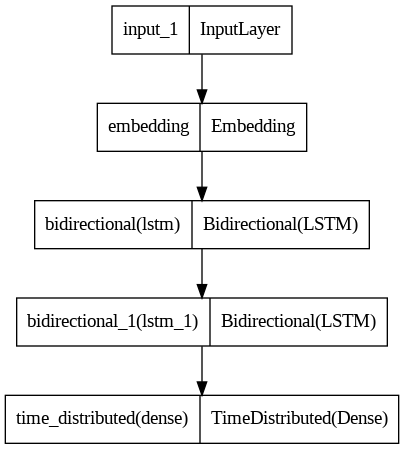

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23979, 110)
(23979, 110, 17)
(23980, 110)
(23980, 110, 17)


In [ ]:
history=model.fit(train_data,
                    validation_data=valid_data,
                    epochs=5,batch_size=132)

Epoch 1/5
182/182 [==============================] - 450s 2s/step - loss: 0.2167 - acc: 0.9643 - val_loss: 0.0984 - val_acc: 0.9719
Epoch 2/5
182/182 [==============================] - 387s 2s/step - loss: 0.0727 - acc: 0.9777 - val_loss: 0.0600 - val_acc: 0.9820
Epoch 3/5
182/182 [==============================] - 430s 2s/step - loss: 0.0425 - acc: 0.9880 - val_loss: 0.0393 - val_acc: 0.9894
Epoch 4/5
182/182 [==============================] - 373s 2s/step - loss: 0.0265 - acc: 0.9926 - val_loss: 0.0347 - val_acc: 0.9905
Epoch 5/5
182/182 [==============================] - 371s 2s/step - loss: 0.0210 - acc: 0.9941 - val_loss: 0.0347 - val_acc: 0.9908


In [ ]:
valid_y_pred=model.predict(valid_data)

182/182 [==============================] - 96s 530ms/step


In [ ]:


big_lst=[]
for i in range(23980):
  lst=[]
  for j in range(110):
    lst.append(np.argmax(y_test[i,j,:]))
  lst=np.array(lst)
  big_lst.append(lst)
y_test_labels=np.array(big_lst)


In [ ]:
valid_y_pred[0,0]

array([9.9930620e-01, 4.0889827e-05, 5.5167579e-08, 1.6360789e-05,
       1.7022738e-05, 1.8390433e-04, 6.5692409e-05, 1.1326797e-04,
       4.0316361e-05, 6.9092952e-05, 4.5809174e-06, 3.3923029e-06,
       5.4723314e-05, 2.2580214e-05, 1.7663158e-05, 3.9946615e-05,
       4.4314788e-06], dtype=float32)

In [ ]:
big_lst=[]
for i in range(23980):
  lst=[]
  for j in range(110):
    lst.append(np.argmax(valid_y_pred[i,j]))
  lst=np.array(lst)
  big_lst.append(lst)
valid_y_label=np.array(big_lst)

In [ ]:
y_test_labels[23980-1,:]

array([ 0,  7,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  3, 10,  0,  0,  0,
        0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
y_test_labels.flatten().size

12100

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,multilabel_confusion_matrix
confusion_matrix(valid_y_label.flatten(),y_test_labels.flatten())


array([[2554110,    1653,      72,     955,     579,    2115,    2568,
           1380,     115,      89,    1111,       3,     805,      56,
             54,      77,      13],
       [    311,   15575,     323,     258,     268,    1009,     154,
            132,      28,       3,       9,       5,      30,       8,
             15,       1,       0],
       [     49,     139,    7370,      11,      27,     116,      43,
              1,      11,       0,       3,      51,       1,       0,
             11,       0,       0],
       [    350,     170,      43,    6203,       3,     316,     102,
              0,       9,       2,     285,       0,       2,      14,
              5,       0,       1],
       [    116,     146,       6,      13,    2473,      10,     256,
              9,       0,       5,      83,      15,       9,       0,
              9,      10,       1],
       [    864,     929,      57,     573,      13,    6129,     295,
             38,      38,       2,     

In [ ]:
print(classification_report(valid_y_label.flatten(),y_test_labels.flatten()))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2565755
           1       0.83      0.86      0.84     18129
           2       0.94      0.94      0.94      7833
           3       0.73      0.83      0.77      7505
           4       0.67      0.78      0.72      3161
           5       0.61      0.68      0.64      8973
           6       0.55      0.67      0.60      6816
           7       0.83      0.91      0.87      9184
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.79      0.83      0.81      8155
          11       0.00      0.00      0.00         0
          12       0.60      0.86      0.71      2289
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0

    accuracy              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##psuedo code

In [ ]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(sequences_ids,y_processed_labels, test_size=.50)

train_data2 = tf.data.Dataset.from_tensor_slices((X_train2,y_train2))

valid_data2 = tf.data.Dataset.from_tensor_slices((X_test2,y_test2))

In [ ]:
def model2():
  inputs=Input(shape=(110,), dtype=tf.int32)
  embeddings=tf.keras.layers.Embedding(36000, 200)(inputs)
  lstm=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True))(embeddings)
  lstm2=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True))(lstm)
  output= tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(17, activation='softmax'))(lstm2)
  model2=tf.keras.Model(inputs,output)
  return model2

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = tf.keras.metrics.SparseCategoricalCrossentropy(
    name='sparse_categorical_crossentropy',
    dtype=None,
    from_logits=True,
    axis=-1
)

In [ ]:
model2=model2()
model2.compile(loss=loss,optimizer='Adam',metrics=metrics)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 110)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 110, 200)          7200000   
                                                                 
 bidirectional_4 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 110, 200)          240800    
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 110, 17)           3417      
 stributed)                                                      
                                                           

In [ ]:
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(23979, 110)
(23979, 110)
(23980, 110)
(23980, 110)


In [ ]:
BATCH_SIZE = 132
SHUFFLE_BUFFER_SIZE = 132

train_data2 = train_data2.batch(BATCH_SIZE)
valid_data2 = valid_data2.batch(BATCH_SIZE)

In [ ]:
train_data2

<_BatchDataset element_spec=(TensorSpec(shape=(None, 110), dtype=tf.int32, name=None), TensorSpec(shape=(None, 110), dtype=tf.int32, name=None))>

In [ ]:
history2=model2.fit(train_data2,
                    validation_data=valid_data2,
                    epochs=5,batch_size=132)

Epoch 1/5
182/182 [==============================] - 478s 3s/step - loss: 0.0179 - sparse_categorical_crossentropy: 0.0179 - val_loss: 0.0368 - val_sparse_categorical_crossentropy: 0.0368
Epoch 2/5
182/182 [==============================] - 507s 3s/step - loss: 0.0162 - sparse_categorical_crossentropy: 0.0162 - val_loss: 0.0350 - val_sparse_categorical_crossentropy: 0.0350
Epoch 3/5
182/182 [==============================] - 405s 2s/step - loss: 0.0141 - sparse_categorical_crossentropy: 0.0141 - val_loss: 0.0361 - val_sparse_categorical_crossentropy: 0.0361
Epoch 4/5
182/182 [==============================] - 461s 3s/step - loss: 0.0122 - sparse_categorical_crossentropy: 0.0122 - val_loss: 0.0391 - val_sparse_categorical_crossentropy: 0.0391
Epoch 5/5
182/182 [==============================] - 404s 2s/step - loss: 0.0109 - sparse_categorical_crossentropy: 0.0109 - val_loss: 0.0387 - val_sparse_categorical_crossentropy: 0.0387


In [ ]:
history2.history

{'loss': [0.017867038026452065,
  0.016183165833353996,
  0.01414783950895071,
  0.012198273092508316,
  0.0108681945130229],
 'sparse_categorical_crossentropy': [0.01786704733967781,
  0.016183169558644295,
  0.014147850684821606,
  0.01219827588647604,
  0.010868193581700325],
 'val_loss': [0.03681294247508049,
  0.03503157198429108,
  0.03612683713436127,
  0.039135828614234924,
  0.03871114179491997],
 'val_sparse_categorical_crossentropy': [0.03681294992566109,
  0.03503158316016197,
  0.03612684831023216,
  0.03913583979010582,
  0.03871115297079086]}

## model building & training using BERT Embeddings and custom NER head

In [ ]:
#!pip install "tf-models-official==2.13.*"

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
#!pip install tensorflow-text

In [ ]:
import tensorflow_text as text

In [ ]:
bert_layer = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',trainable=False)
#bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

In [ ]:
bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

In [ ]:
#bert_preprocess_model(ner['Sentence'])

In [ ]:
#encoder_inputs['input_word_ids']

In [10]:
ner_sample_train=ner.iloc[:2500,:]
ner_sample_test=ner.iloc[2500:5000,:]
print(ner_sample_train.shape)
print(ner_sample_test.shape)


(2500, 5)
(2500, 5)


In [11]:
def process_tags(lst):
  processtags=[]
  for i in range(len(lst)):
    processtags.append(tag2id[lst[i]])
  return np.asarray(processtags)

ner_sample_train['new_tags2']=ner_sample_train['new_tags'].apply(process_tags)
ner_sample_test['new_tags2']=ner_sample_test['new_tags'].apply(process_tags)

<ipython-input-11-1ffcff2272eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ner_sample_train['new_tags2']=ner_sample_train['new_tags'].apply(process_tags)
<ipython-input-11-1ffcff2272eb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ner_sample_test['new_tags2']=ner_sample_test['new_tags'].apply(process_tags)


In [ ]:
bert_layer(bert_preprocess_model(ner_sample_train['Sentence']))

In [ ]:
encoded_outputs['sequence_output']

In [ ]:
def model3():
  inputs=Input(shape=(110,), dtype=tf.int32)
  dense=tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(512/2, activation='relu'))(inputs)
  output= tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(17, activation='softmax'))(dense)
  model3=tf.keras.Model(inputs,output)
  return model3

## NER with BERT embeddings from hugging face

In [12]:
from transformers import TFAutoModel, AutoTokenizer

In [13]:
bertmodel=TFAutoModel.from_pretrained('google-bert/bert-base-cased')
berttokenizer=AutoTokenizer.from_pretrained('google-bert/bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [14]:
import string
string.punctuation
# removing punctuations
def remove_punc(text):

    clean_text = "".join([i for i in text if i not in string.punctuation])
    return clean_text

ner_sample_train['Sentence']  = ner_sample_train['Sentence'].apply(lambda x: remove_punc(x))
ner_sample_test['Sentence']  = ner_sample_test['Sentence'].apply(lambda x: remove_punc(x))

<ipython-input-14-39bc334d2006>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ner_sample_train['Sentence']  = ner_sample_train['Sentence'].apply(lambda x: remove_punc(x))
<ipython-input-14-39bc334d2006>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ner_sample_test['Sentence']  = ner_sample_test['Sentence'].apply(lambda x: remove_punc(x))


In [15]:
bert_encoding_train=berttokenizer([x for x in ner_sample_train.Sentence],max_length=110,padding='max_length',truncation=True,return_tensors='tf')
bert_encoding_test=berttokenizer([x for x in ner_sample_test.Sentence],max_length=110,padding='max_length',truncation=True,return_tensors='tf')

In [81]:
berttokenizer.convert_ids_to_tokens(berttokenizer([x for x in ner_sample_train.Sentence][100])['input_ids'])

['[CLS]',
 'The',
 'Pakistani',
 'military',
 'launched',
 'its',
 'offensive',
 'in',
 'Or',
 '##ak',
 '##zai',
 'to',
 'hunt',
 'Taliban',
 'insurgents',
 '[SEP]']

In [80]:
print(len(bert_encoding_train.word_ids(100)),len(ner_sample_train['new_tags2'][100]),ner_sample_train['new_tags2'][100],ner_sample_train['Sentence'][100])

110 13 [0 2 0 0 0 0 0 1 0 0 5 0 0] The Pakistani military launched its offensive in Orakzai to hunt Taliban insurgents 


In [16]:
#function to adjust the labels
def adjusted_labels(bert_encodings,series):
  adjustedlabels=[]
  for i in range(series.shape[0]):
    current_label=series.iloc[i]
    tempadj=[]
    prev_wdx=-1
    for word_idx in bert_encodings.word_ids(i):
      if word_idx==None:
        tempadj.append(-100)
      elif word_idx!=prev_wdx:
        #print(i,word_idx,current_label)
        tempadj.append(current_label[word_idx])
        prev_wdx= word_idx
      else:
        tempadj.append(current_label[word_idx])
    adjustedlabels.append(np.array(tempadj))
  return np.array(adjustedlabels)

y_train_labels=adjusted_labels(bert_encoding_train,ner_sample_train['new_tags2'])
y_test_labels=adjusted_labels(bert_encoding_test,ner_sample_test['new_tags2'])






In [ ]:
y_train_labels[0],y_test_labels[0]

In [ ]:
bertmodel(bert_encoding_train)

In [17]:
bert_embed_train=bertmodel(bert_encoding_train)['last_hidden_state']
bert_embed_test=bertmodel(bert_encoding_test)['last_hidden_state']

In [18]:
y_train_labels[100]

array([-100,    0,    2,    0,    0,    0,    0,    0,    1,    1,    1,
          0,    0,    5,    0, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100,
       -100, -100, -100, -100, -100, -100, -100, -100, -100, -100, -100])

In [19]:
print(bert_embed_train.shape)
print(bert_embed_test.shape)
print(y_train_labels.shape)
print(y_test_labels.shape)

(2500, 110, 768)
(2500, 110, 768)
(2500, 110)
(2500, 110)


In [22]:
train_data3 = tf.data.Dataset.from_tensor_slices((bert_embed_train,y_train_labels))

valid_data3 = tf.data.Dataset.from_tensor_slices((bert_embed_test,y_train_labels))

In [24]:
BATCH_SIZE = 128
SHUFFLE_BUFFER_SIZE = 128

train_data3 = train_data3.batch(BATCH_SIZE)
valid_data3 = valid_data3.batch(BATCH_SIZE)

In [51]:
def model3():
  inputs=Input(shape=(110,768), dtype=tf.int32)
  input2= tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(768/2, activation='relu'))(inputs)
  output= tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(17, activation='softmax'))(input2)
  model3=tf.keras.Model(inputs,output)
  return model3

In [43]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()
metrics = tf.keras.metrics.Accuracy(
    name='accuracy', dtype=None
)

In [52]:
model3=model3()
model3.compile(loss=loss,optimizer='Adam',metrics='accuracy')
model3.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 110, 768)]        0         
                                                                 
 time_distributed_9 (TimeDi  (None, 110, 384)          295296    
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, 110, 17)           6545      
 istributed)                                                     
                                                                 
Total params: 301841 (1.15 MB)
Trainable params: 301841 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
history3=model3.fit(train_data3,
                    validation_data=valid_data3,
                    epochs=5,batch_size=128)

Epoch 1/5
20/20 [==============================] - 2s 50ms/step - loss: nan - accuracy: 0.1615 - val_loss: nan - val_accuracy: 0.1694
Epoch 2/5
20/20 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.1694 - val_loss: nan - val_accuracy: 0.1694
Epoch 3/5
20/20 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.1694 - val_loss: nan - val_accuracy: 0.1694
Epoch 4/5
20/20 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.1694 - val_loss: nan - val_accuracy: 0.1694
Epoch 5/5
20/20 [==============================] - 1s 43ms/step - loss: nan - accuracy: 0.1694 - val_loss: nan - val_accuracy: 0.1694


## fintued TFBERTForTokenClassifaction from hugging face on custom data set

In [ ]:
from transformers import TFAutoModel, AutoTokenizer

In [ ]:
bertmodel=AutoModel.from_pretrained('')